In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
df = pd.read_csv('../data/dalles_flow.csv',skiprows=2)

Text(0.5, 1.0, ' Columbia River Annual Mean versus Peak Daily Flow\nMeasured at The Dalles, OR (1879 - 1950)')

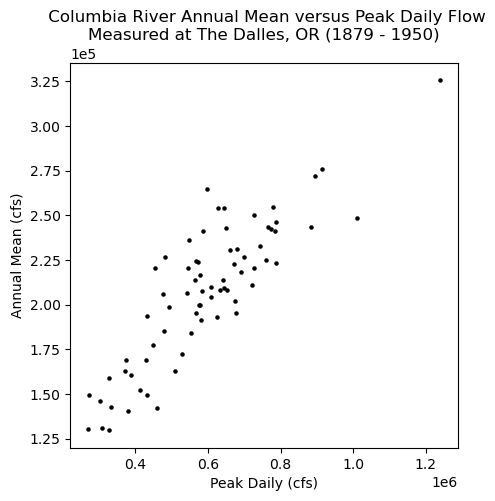

In [3]:
fig, ax = plt.subplots(figsize=(5,5))
df.plot.scatter(x='Peak Daily (cfs)', y='Annual Mean (cfs)', ax=ax, marker='.', c='k');
ax.ticklabel_format(axis='both', style='scientific', scilimits=[-3,5]);
ax.set_title(' Columbia River Annual Mean versus Peak Daily Flow\nMeasured at The Dalles, OR (1879 - 1950)')

Text(0.5, 1.0, ' Columbia River Annual Mean versus Peak Daily Flow\nMeasured at The Dalles, OR (1879 - 1950)')

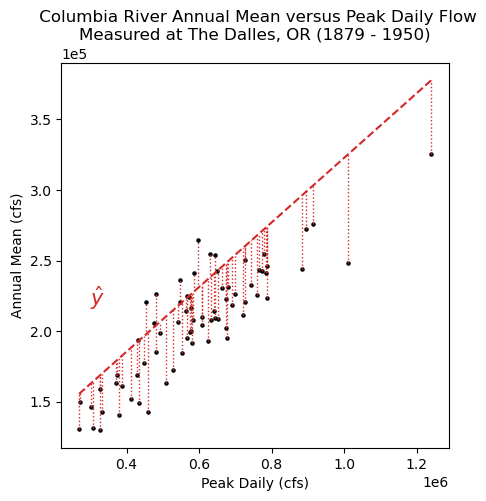

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
df.plot.scatter(x='Peak Daily (cfs)', y='Annual Mean (cfs)', ax=ax, marker='.', c='k');

y = df['Annual Mean (cfs)']
x = df['Peak Daily (cfs)']

B1, B0, r, p, stderr = stats.linregress(x.values[~np.isnan(y.values)],y.values[~np.isnan(y.values)])
x_sorted = np.sort(x.values[~np.isnan(y.values)])
y_hat = B0 + B1*1.2*x_sorted
ax.plot(x_sorted, y_hat,c='tab:red',linestyle='--')
ind = np.argsort(x.values[~np.isnan(y.values)])
y_sorted = y.values[~np.isnan(y.values)][ind]


for i, this_y in enumerate(y_sorted):
    if this_y < y_hat[i]:
        ax.plot([x_sorted[i], x_sorted[i]], [this_y, y_hat[i]], lw=1, linestyle=':', c='tab:red')
    if this_y > y_hat[i]:
        ax.plot([x_sorted[i], x_sorted[i]], [y_hat[i], this_y],  lw=1, linestyle=':', c='tab:red')

        
        
ax.text(0.3*1e6, np.mean(y)+0.11e5, '$\hat{y}$', c='tab:red',size=15)

ax.ticklabel_format(axis='both', style='scientific', scilimits=[-3,5]);
ax.set_title(' Columbia River Annual Mean versus Peak Daily Flow\nMeasured at The Dalles, OR (1879 - 1950)')

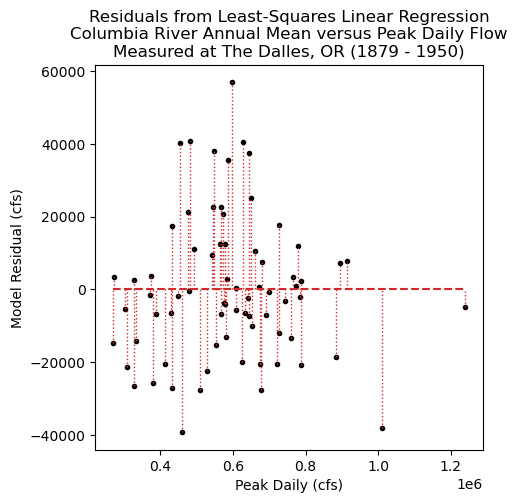

In [5]:
fig, ax = plt.subplots(figsize=(5,5))


y = df['Annual Mean (cfs)']
x = df['Peak Daily (cfs)']


B1, B0, r, p, stderr = stats.linregress(x.values[~np.isnan(y.values)],y.values[~np.isnan(y.values)])
x_sorted = np.sort(x.values[~np.isnan(y.values)])
y_hat = B0 + B1*x_sorted




ax.plot(x_sorted, y_hat-y_hat,c='tab:red',linestyle='--')
ind = np.argsort(x.values[~np.isnan(y.values)])
y_sorted = y.values[~np.isnan(y.values)][ind]

ax.scatter(x_sorted, y_sorted-y_hat, marker='.', c='k');

for i, this_y in enumerate(y_sorted):
    if this_y < y_hat[i]:
        ax.plot([x_sorted[i], x_sorted[i]], [this_y, y_hat[i]]-y_hat[i], lw=1, linestyle=':', c='tab:red')
    if this_y > y_hat[i]:
        ax.plot([x_sorted[i], x_sorted[i]], [y_hat[i], this_y]-y_hat[i],  lw=1, linestyle=':', c='tab:red')

        
        
#ax.text(0.3*1e6, np.mean(y)+0.11e5, '$\hat{y}$', c='tab:red',size=15)

ax.ticklabel_format(axis='both', style='scientific', scilimits=[-3,5]);
ax.set_title('Residuals from Least-Squares Linear Regression\nColumbia River Annual Mean versus Peak Daily Flow\nMeasured at The Dalles, OR (1879 - 1950)')

ax.set_xlabel('Peak Daily (cfs)');
ax.set_ylabel('Model Residual (cfs)');

Text(0.5, 0, 'Model Residual (cfs)')

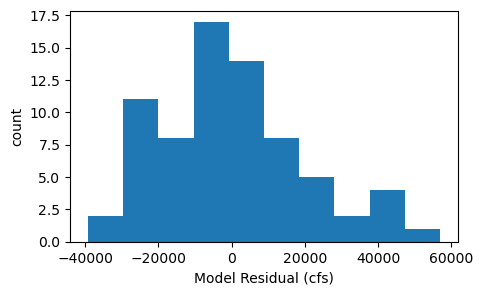

In [6]:
fig, ax = plt.subplots(figsize=(5,3))
ax.hist(y_sorted-y_hat);
ax.set_ylabel('count')
ax.set_xlabel('Model Residual (cfs)')